<a href="https://colab.research.google.com/github/xiaohuiliugis/Integrating-Machine-Learning-into-Geographic-Research/blob/main/Seagrass_MachineLearning_DecisionTree_RandomForest_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 13.4MB/s 
     |████████████████████████████████| 6.5MB 22.1MB/s 
     |████████████████████████████████| 14.8MB 316kB/s 


In [ ]:
import geopandas as gpd

In [ ]:
coastline_attr_gpd = gpd.read_file("/content/drive/MyDrive/2021AAGWorkshop/Demo/Data/coastline_attr_seagrass.shp")

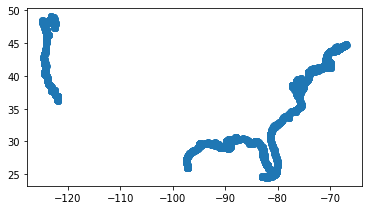

In [ ]:
coastline_attr_gpd.plot()

In [ ]:
coastline_attr_gpd.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,sea_grass,geometry
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,1,POINT (-82.22100 24.50021)
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,1,POINT (-81.16694 25.14926)
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.58674 29.24938)
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,1,POINT (-76.05466 36.96940)
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,1,POINT (-76.38891 39.27398)


In [ ]:
coastline_attr_gpd["x"] = coastline_attr_gpd.geometry.x
coastline_attr_gpd["y"] = coastline_attr_gpd.geometry.y
coastline_attr_gpd.head()

,CID,salinity,srtm30,silicate,phosphate,nitrate,disso2,temp,sea_grass,geometry,x,y
0,1,36.1645,-13.54730,2.14787,0.085490,0.672583,4.73538,26.0314,1,POINT (-82.22100 24.50021),-82.221000,24.500212
1,1,35.8820,-5.29631,3.39048,0.081309,0.589654,4.82170,26.2659,1,POINT (-81.16694 25.14926),-81.166938,25.149262
2,1,28.2685,5.36795,4.50515,0.220880,1.225100,4.74903,23.2961,0,POINT (-90.58674 29.24938),-90.586741,29.249380
3,1,27.8134,-11.50460,2.30621,0.353542,2.226290,5.55894,14.3673,1,POINT (-76.05466 36.96940),-76.054661,36.969399
4,1,16.0193,-4.73809,2.47356,0.409711,2.607220,5.76708,13.9874,1,POINT (-76.38891 39.27398),-76.388908,39.273977


In [ ]:
coastline_attr_gpd.shape

(10000, 12)

In [ ]:
training_data = coastline_attr_gpd.sample(frac=0.8, random_state=42)
test_data = coastline_attr_gpd.drop(training_data.index)

In [ ]:
training_label = training_data.pop("nitrate")
test_label = test_data.pop("nitrate")

In [ ]:
training_data = training_data[["salinity","srtm30",	"silicate",	"phosphate",	"disso2",	"temp",	"x",	"y"]]

In [ ]:
test_data = test_data[["salinity","srtm30",	"silicate",	"phosphate",	"disso2",	"temp",	"x",	"y"]]

In [ ]:
training_data.head()

,salinity,srtm30,silicate,phosphate,disso2,temp,x,y
6252,33.1483,-56.1788,17.08550,1.138370,5.36714,9.83431,-124.496989,42.579380
4684,35.7009,-21.0945,1.38960,0.199679,5.05932,21.88080,-77.202987,34.580760
1731,35.4923,-17.9311,2.58428,0.131155,4.91319,23.08300,-81.368064,30.280428
4742,30.8778,-57.5877,15.09390,1.082800,6.37896,9.31756,-122.636420,48.201936
4521,32.6253,-68.5389,4.57709,0.671806,6.41385,7.43766,-67.829796,44.443662


In [ ]:
training_label.head()

6252    9.058800
4684    1.079670
1731    0.844095
4742    7.414680
4521    5.384510
Name: nitrate, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=10,random_state=42)
forest_reg = RandomForestRegressor(min_samples_leaf=10,random_state=42)

In [ ]:
tree_reg.fit(training_data,training_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
forest_reg.fit(training_data,training_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_tree = tree_reg.predict(test_data)
y_pred_forest = forest_reg.predict(test_data)

In [ ]:
y_pred_tree[0]

0.5906545000000001

In [ ]:
test_label_np = test_label.to_numpy()
test_label_np[0]

0.589654

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = mean_squared_error(test_label_np,y_pred_tree, squared=False)
rmse

0.017314144357289965

In [ ]:
rmse = mean_squared_error(test_label_np,y_pred_forest, squared=False)
rmse

0.015396886585799813

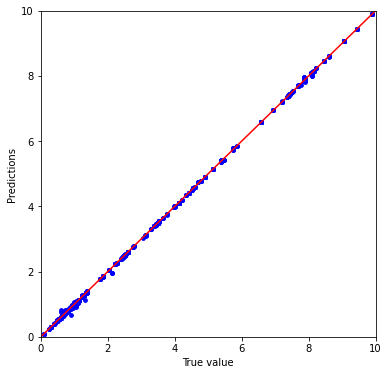

In [ ]:
# to visually see how our prediction aligns with the true observations
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(test_label_np,y_pred_forest, s=14, c='blue')
plt.xlabel("True value")
plt.ylabel("Predictions")

# draw a reference line
lim = [0,10]
plt.xlim(lim)
plt.ylim(lim)
plt.plot(lim,lim,"r-")
